* [Merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html)
* [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
* [Reshaping in Pandas - Pivot, Pivot-Table, Stack, and Unstack explained with Pictures](https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/)

В приложенном zip-архиве находятся четыре файла, содержащие часть данных по одному из наших опросов. Это ответы на два вопроса – «Год рождения» (возраст) и «Что в онлайн-играх кажется Вам наиболее важным?» (игровая мотивация). Кроме того, в файлах есть сведения о том, из какой страны человек отвечал, на каком языке и на каком из четырёх игровых регионов (RU, EU, NA, SEA) он зарегистрирован. Один человек мог выбрать от одного до трёх вариантов ответа на второй вопрос. Несколько таких ответов записаны отдельными строками в файле answers.

К отчёту желательно приложить скрипт обработки данных. Если что-то делалось отдельно от этого скрипта, упомянуть об этом в комментариях.

Расшифровка вариантов ответа находится в отдельном файле options.

Некоторые данные в файле responses могут быть пропущены – соответствующих респондентов можно игнорировать.

Вам необходимо дать ответ на несколько вопросов:
* Какова основная мотивация игроков?
* Есть ли связь между возрастом и игровой мотивацией?
* Как различается игровая мотивация в четырёх основных регионах?
* Какие ещё исследовательские вопросы Вы могли бы поставить на основании этих данных и какими методами предлагаете их решать?

Описание всех переменных, которые есть в файлах:
* question_id
* Question – номер вопроса
* language (в файлах questions и options) – язык варианта ответа или текста вопроса в соответствующей строке
* language (в файле responses) – язык, на котором участники отвечали на опрос option_id – идентификатор варианта ответа на вопрос
* response_id – идентификатор респондента
* title – формулировка вопроса
* value – формулировка варианта ответа
* REALM – регион (один из 4 вариантов), в котором игрок зарегистрирован -сountry – страна, из которой человек отвечал

In [150]:
import pandas as pd
import numpy as np


%matplotlib inline

In [2]:
options = pd.read_csv("../data/options.csv")
questions = pd.read_csv("../data/questions.csv")
test_answers = pd.read_csv("../data/test_answers.csv")
test_responses = pd.read_csv("../data/test_responses.csv")

# Подготовка данных

In [3]:
questions.shape

(4, 3)

In [4]:
questions.head()

,question_id,language,title
0,41.0,Russian,Что в онлайн-играх кажется Вам наиболее важным?
1,41.0,English,What is most important for you in online games...
2,67.0,Russian,Год рождения
3,67.0,English,What year were you born in?


In [5]:
options.shape

(412, 4)

In [6]:
options.head()

,option_id,language,value,question_id
0,10250.0,Russian,"Вести командную игру (совместные действия, общ...",41
1,10250.0,English,"Вести командную игру (совместные действия, общ...",41
2,10251.0,Russian,"Расслабиться, отдохнуть за игрой",41
3,10251.0,English,"Расслабиться, отдохнуть за игрой",41
4,10252.0,Russian,"Ощутить превосходство над противником, быть си...",41


In [7]:
test_answers.shape

(67898, 3)

In [8]:
test_answers.head()

,response_id,Question,option_id
0,2,67,10353
1,4,41,10250
2,4,41,10251
3,4,41,10253
4,4,67,10345


In [9]:
test_responses.shape

(20538, 4)

In [10]:
test_responses.head()

,response_id,REALM,country,language
0,2,RU,Russian Federation,Russian
1,4,RU,Russian Federation,Russian
2,7,EU,France,French
3,8,EU,Spain,Spanish
4,9,EU,Spain,Spanish


> Некоторые данные в файле responses могут быть пропущены – соответствующих респондентов можно игнорировать.

In [11]:
set(test_answers.response_id.tolist()) - set(test_responses.response_id.tolist())

{22824,
 22825,
 22826,
 22829,
 22830,
 22831,
 22832,
 22833,
 22835,
 22836,
 22837,
 22840,
 22841,
 22842,
 22843,
 22845,
 22846,
 22848,
 22850,
 22852,
 22853,
 22855,
 22857,
 22858,
 22863,
 22865,
 22866,
 22867,
 22868,
 22869,
 22871,
 22872,
 22874,
 22875,
 22879,
 22880,
 22881,
 22882,
 22885,
 22886,
 22891,
 22892,
 22894,
 22898,
 22900,
 22901,
 22903,
 22904,
 22906,
 22907,
 22909,
 22912,
 22921,
 22924,
 22925,
 22927,
 22930,
 22936,
 22938,
 22940,
 22941,
 22942,
 22943,
 22944,
 22945,
 22946,
 22947,
 22949,
 22951,
 22952,
 22953,
 22955,
 22956,
 22958,
 22959,
 22960,
 22961,
 22962,
 22964,
 22966,
 22967,
 22968,
 22969,
 22970,
 22971,
 22972,
 22973,
 22974,
 22976,
 22977,
 22980,
 22982,
 22985,
 22986,
 22988,
 22989,
 22991,
 22995,
 22999,
 23000,
 23001,
 23002,
 23004,
 23005,
 23007,
 23008,
 23009,
 23010,
 23011,
 23012,
 23014,
 23015,
 23016,
 23017,
 23018,
 23019,
 23020,
 23023,
 23024,
 23026,
 23028,
 23029,
 23030,
 23031,
 23032,


In [12]:
answers_responses = pd.merge(
    test_answers, test_responses, how="inner",
    on="response_id").rename(columns={"Question": "question_id"})
answers_responses.head()

,response_id,question_id,option_id,REALM,country,language
0,2,67,10353,RU,Russian Federation,Russian
1,4,41,10250,RU,Russian Federation,Russian
2,4,41,10251,RU,Russian Federation,Russian
3,4,41,10253,RU,Russian Federation,Russian
4,4,67,10345,RU,Russian Federation,Russian


In [13]:
answers_responses.shape

(52065, 6)

In [14]:
questions.head()

,question_id,language,title
0,41.0,Russian,Что в онлайн-играх кажется Вам наиболее важным?
1,41.0,English,What is most important for you in online games...
2,67.0,Russian,Год рождения
3,67.0,English,What year were you born in?


In [15]:
questions.question_id = questions.question_id.astype("int")

In [16]:
answers_responses = pd.merge(answers_responses, questions.query("language == 'Russian'"),
         how="left", on=["question_id"])\
        .drop("language_y", axis=1)\
        .rename(columns={"language_x": "language", "title": "question_title"})
answers_responses.head()

,response_id,question_id,option_id,REALM,country,language,question_title
0,2,67,10353,RU,Russian Federation,Russian,Год рождения
1,4,41,10250,RU,Russian Federation,Russian,Что в онлайн-играх кажется Вам наиболее важным?
2,4,41,10251,RU,Russian Federation,Russian,Что в онлайн-играх кажется Вам наиболее важным?
3,4,41,10253,RU,Russian Federation,Russian,Что в онлайн-играх кажется Вам наиболее важным?
4,4,67,10345,RU,Russian Federation,Russian,Год рождения


In [17]:
options.option_id = options.option_id.astype("int")

In [18]:
options.drop_duplicates(subset=["option_id", "value", "question_id"], inplace=True)

In [19]:
options.language.nunique()

1

In [20]:
options.drop("language", axis=1, inplace=True)

In [21]:
df = pd.merge(
    answers_responses, options,
    on=["option_id",
        "question_id"]).rename(columns={"value": "response_title"})

In [22]:
df.head()

,response_id,question_id,option_id,REALM,country,language,question_title,response_title
0,2,67,10353,RU,Russian Federation,Russian,Год рождения,1986
1,53,67,10353,EU,Ireland,English (UK),Год рождения,1986
2,84,67,10353,EU,United Kingdom,English (UK),Год рождения,1986
3,195,67,10353,EU,Germany,German,Год рождения,1986
4,221,67,10353,SEA,Taiwan,Chinese (Taiwan),Год рождения,1986


In [23]:
df.shape

(52065, 8)

# Какова основная мотивация игроков?

In [24]:
df.question_title.unique()

array(['Год рождения', 'Что в онлайн-играх кажется Вам наиболее важным?'],
      dtype=object)

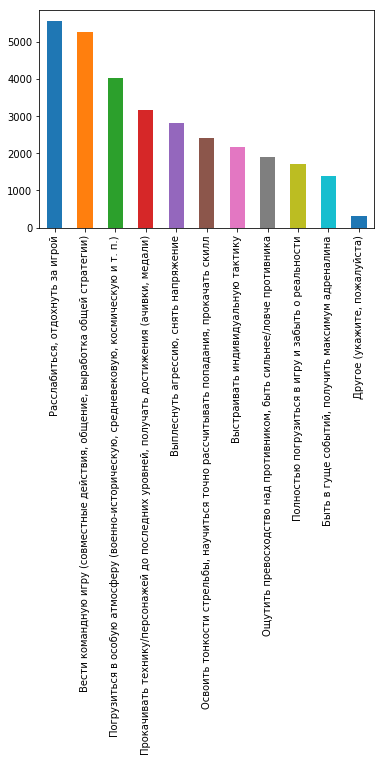

In [25]:
df.query("question_id == 41").response_title.value_counts().plot(kind="bar")

# Есть ли связь между возрастом и игровой мотивацией?

In [67]:
df.drop_duplicates(subset=["response_id", "question_id", "option_id"], inplace=True)

In [77]:
df.query("response_id == 22814")

,response_id,question_id,option_id,REALM,country,language,question_title,response_title
22351,22814,41,10257,RU,Russian Federation,Russian,Что в онлайн-играх кажется Вам наиболее важным?,Прокачивать технику/персонажей до последних ур...
30138,22814,41,10259,RU,Russian Federation,Russian,Что в онлайн-играх кажется Вам наиболее важным?,"Освоить тонкости стрельбы, научиться точно рас..."
33784,22814,41,10258,RU,Russian Federation,Russian,Что в онлайн-играх кажется Вам наиболее важным?,Полностью погрузиться в игру и забыть о реальн...
47205,22814,67,10354,RU,Russian Federation,Russian,Год рождения,1985


In [69]:
birth = df[["response_id", "question_title", "response_title"]]\
    .query("question_title == 'Год рождения'").set_index("response_id")
birth.query("response_id == 22814")

,question_title,response_title
response_id,,
22814,Год рождения,1985


In [71]:
important = df[["response_id", "question_title", "response_title"]]\
    .query("question_title == 'Что в онлайн-играх кажется Вам наиболее важным?'").set_index("response_id")
important.query("response_id == 22814")

,question_title,response_title
response_id,,
22814,Что в онлайн-играх кажется Вам наиболее важным?,Прокачивать технику/персонажей до последних ур...
22814,Что в онлайн-играх кажется Вам наиболее важным?,"Освоить тонкости стрельбы, научиться точно рас..."
22814,Что в онлайн-играх кажется Вам наиболее важным?,Полностью погрузиться в игру и забыть о реальн...


In [124]:
df_ready = (pd.merge(birth, important, left_index=True, right_index=True)
    .rename(columns={"response_title_x": "birth_year", "response_title_y": "motivation"})
    .drop(["question_title_x", "question_title_y"], axis=1)
)
df_ready.head()

,birth_year,motivation
response_id,,
4,1994,"Вести командную игру (совместные действия, общ..."
4,1994,"Расслабиться, отдохнуть за игрой"
4,1994,Погрузиться в особую атмосферу (военно-историч...
9,1999,Погрузиться в особую атмосферу (военно-историч...
13,1999,"Вести командную игру (совместные действия, общ..."


In [125]:
df_ready.birth_year = df_ready.birth_year.astype("int")

In [126]:
df_ready["age"] = 2017 - df_ready["birth_year"]

In [161]:
df_ready["cohorts"] = pd.cut(df_ready.age, [-np.inf] + list(range(15, 66, 10)) + [np.inf], right=False)

In [162]:
df_ready.head()

,birth_year,motivation,age,cohorts
response_id,,,,
4,1994,"Вести командную игру (совместные действия, общ...",23,"[20.0, 25.0)"
4,1994,"Расслабиться, отдохнуть за игрой",23,"[20.0, 25.0)"
4,1994,Погрузиться в особую атмосферу (военно-историч...,23,"[20.0, 25.0)"
9,1999,Погрузиться в особую атмосферу (военно-историч...,18,"[15.0, 20.0)"
13,1999,"Вести командную игру (совместные действия, общ...",18,"[15.0, 20.0)"


In [163]:
df_ready.cohorts.value_counts()

[15.0, 20.0)    6351
[20.0, 25.0)    4937
[25.0, 30.0)    4229
[30.0, 35.0)    3239
[35.0, 40.0)    2628
[-inf, 15.0)    2458
[40.0, 45.0)    2034
[45.0, 50.0)    1713
[50.0, 55.0)    1212
[55.0, 60.0)     860
[65.0, inf)      532
[60.0, 65.0)     450
Name: cohorts, dtype: int64

In [170]:
df_ready.motivation.value_counts()

Расслабиться, отдохнуть за игрой                                                             5550
Вести командную игру (совместные действия, общение, выработка общей стратегии)               5267
Погрузиться в особую атмосферу (военно-историческую, средневековую, космическую и т. п.)     3990
Прокачивать технику/персонажей до последних уровней, получать достижения (ачивки, медали)    3138
Выплеснуть агрессию, снять напряжение                                                        2811
Освоить тонкости стрельбы, научиться точно рассчитывать попадания, прокачать скилл           2406
Выстраивать индивидуальную тактику                                                           2154
Ощутить превосходство над противником, быть сильнее/ловче противника                         1908
Полностью погрузиться в игру и забыть о реальности                                           1722
Быть в гуще событий, получить максимум адреналина                                            1390
Другое (укажите, пож

In [169]:
df_ready.groupby("cohorts")["motivation"].value_counts() / df_ready.motivation.value_counts()#.plot(kind="bar", figsize=(30, 30))

ValueError: cannot join with no level specified and no overlapping names

In [28]:
df.pivot(columns='question_title')

response_id                                                  \
question_title Год рождения Что в онлайн-играх кажется Вам наиболее важным?   
0                       2.0                                             NaN   
1                      53.0                                             NaN   
2                      84.0                                             NaN   
3                     195.0                                             NaN   
4                     221.0                                             NaN   
5                     239.0                                             NaN   
6                     254.0                                             NaN   
7                     365.0                                             NaN   
8                     376.0                                             NaN   
9                     443.0                                             NaN   
10                    556.0                                             NaN   
11                    565.0                                             NaN   
12                    665.0                                             NaN   
13                    696.0                                             NaN   
14                    731.0                                             NaN   
15                    776.0                                             NaN   
16                    859.0                                             NaN   
17                    896.0                                             NaN   
18                   1010.0                                             NaN   
19                   1137.0                                             NaN   
20                   1199.0                                             NaN   
21                   1311.0                                             NaN   
22                   1355.0                                             NaN   
23                   1364.0                                             NaN   
24                   1370.0                                             NaN   
25                   1451.0                                             NaN   
26                   1530.0                                             NaN   
27                   1545.0                                             NaN   
28                   1549.0                                             NaN   
29                   1793.0                                             NaN   
...                     ...                                             ...   
52035               11748.0                                             NaN   
52036               17591.0                                             NaN   
52037                8050.0                                             NaN   
52038               18203.0                                             NaN   
52039                8299.0                                             NaN   
52040               13964.0                                             NaN   
52041                8767.0                                             NaN   
52042               20214.0                                             NaN   
52043                9374.0                                             NaN   
52044               11730.0                                             NaN   
52045               15235.0                                             NaN   
52046               16705.0                                             NaN   
52047               17646.0                                             NaN   
52048               17700.0                                             NaN   
52049               17742.0                                             NaN   
52050               19219.0                                             NaN   
52051               10004.0                                             NaN   
52052               15931.0                                       